<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ssd_reviews.csv')
df.head(5)

Unnamed: 0                                       review_title  \
0           0                                              solid   
1           1  nice drive for price even cheaper by todays costs   
2           2                                            perfect   
3           3                                        very snappy   
4           4                                     worth the hype   

                                      overall_review  \
0           buy it you will not regret this purchase   
1                                   good drive price   
2  used this drive as my boot drive and only data...   
3  os boots quicker os menus pop up quicker gamin...   
4  this was the sdd that everyone said to get and...   

                                                pros  \
0  reliable fast silent cool running drive highly...   
1  been running almost constantly since when i pu...   
2            good value decently fast good longevity   
3  noticeable improvement in os performance over ...   
4                                                NaN   

                                                cons ownership_pariod  \
0                                                NaN            years   
1                                                NaN            years   
2                                        none so far            years   
3  samsung magician software causes some games to...            years   
4                                                NaN            years   

                  date  rating_stars  year  month  day  
0  2019-12-05 12:58:58             5  2019     12    5  
1  2019-11-01 08:25:45             5  2019     11    1  
2  2019-10-27 17:05:49             5  2019     10   27  
3  2019-10-24 18:29:43             5  2019     10   24  
4  2019-09-11 19:21:03             5  2019      9   11

In [51]:
print("The Review dataset has ", df.shape[0]," rows and ",df.shape[1], "columns")

The Review dataset has  2227  rows and  11 columns


### Check info of the dataset and write your findings

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


* There are five columns with null data - review_title, overall_review, pros, cons and ownership_period.

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [72]:
pd.DataFrame(data = (df.isna().sum()*100 / len(df)), columns= ['%Missing_value_count'])

%Missing_value_count
Unnamed: 0                   0.0000000
review_title                 4.3107319
overall_review              34.9797934
pros                         0.9878761
cons                         0.4939380
ownership_pariod             3.0534351
date                         0.0000000
rating_stars                 0.0000000
year                         0.0000000
month                        0.0000000
day                          0.0000000

* 65% of dataset has overall review.

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [8]:
df['rating_stars'].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

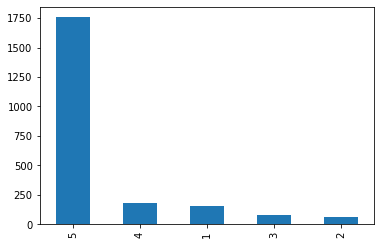

In [9]:
df['rating_stars'].value_counts().plot(kind = 'bar')

* Dataset is highly imbalanced with very count of data with highest rating 5 relative to data count with lower rating.

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [10]:
df['year'].value_counts()

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

* data review is captured from 2014 to 2019. However the data is again imbalanced with very high data accounted in year 2015 and very low in recent years.


#### Check mean rating for each year and write your findings

In [11]:
df.groupby('year')['rating_stars'].mean().sort_values(ascending= False)

year
2014   4.9230769
2016   4.5900826
2017   4.5108108
2015   4.4582505
2019   4.3478261
2018   4.3475936
Name: rating_stars, dtype: float64

* Data is biased with high rating review for every year

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [12]:
df['month'].value_counts()

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

In [74]:
df.groupby('month')['rating_stars'].mean().sort_values(ascending= False)

month
7    4.7638889
1    4.6425339
3    4.6111111
6    4.5571429
9    4.5414013
8    4.4789916
11   4.4607330
5    4.4493671
4    4.4195122
2    4.4058577
12   4.3597122
10   4.3049645
Name: rating_stars, dtype: float64

* Monthwise the data is fairly distributed however the data is still biased for high rating review. 
* Data count captured is highest for December and lowest for August month.
* Mean rating is highest for July month and lowest for October month

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [76]:
drop_columns = ['Unnamed: 0','date','year','month','day','ownership_pariod','rating_stars']
df_text = df.drop(drop_columns, axis = 1)
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_title    2131 non-null   object
 1   overall_review  1448 non-null   object
 2   pros            2205 non-null   object
 3   cons            2216 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [77]:
print("The New Review dataset has ", df_text.shape[0]," rows and ",df_text.shape[1], "columns")

The New Review dataset has  2227  rows and  4 columns


* The new dataset with only review information having 2227 data count , has null values in all columns


#### Replace null values (NaN) with blanks

In [78]:
df_text.fillna(" ",inplace=True)

In [17]:
df_text.isna().sum()

review_title      0
overall_review    0
pros              0
cons              0
dtype: int64

In [79]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_title    2227 non-null   object
 1   overall_review  2227 non-null   object
 2   pros            2227 non-null   object
 3   cons            2227 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [80]:
df_text['combined_review']=df_text.apply(lambda x: " ".join(x), axis=1)

In [81]:
df_text['combined_review']

0       solid buy it you will not regret this purchase...
1       nice drive for price even cheaper by todays co...
2       perfect used this drive as my boot drive and o...
3       very snappy os boots quicker os menus pop up q...
4       worth the hype this was the sdd that everyone ...
5       good price dont be shy about this buy fast and...
6       ssd strong   its still working its a little on...
7       it died used this as a storage drive for steam...
8       ssd s are meh i ve been using samsung electron...
9       good ssd for sata i bought this for to replace...
10      amzing price a fast drive at a great price no ...
11      ssds overrated would not recommend any ssd for...
12      love it recommend 100 nothing to say so fast b...
13      nothing lasts trying to find a replacement tha...
14                    a1 seller   works as should no cons
15      very fast drive these drives are a little pric...
16      worth it bought this to bring my current at th...
17      bad pr

#### Check if there are any null values and drop NaN values if any

In [82]:
df_text['combined_review'].isna().sum()

0

#### Calculate the length of each review and add it to the dataframe

In [83]:
df_text['length']=df_text['combined_review'].apply(lambda x: len(x.split()))

In [84]:
df_text.head()

review_title  \
0                                              solid   
1  nice drive for price even cheaper by todays costs   
2                                            perfect   
3                                        very snappy   
4                                     worth the hype   

                                      overall_review  \
0           buy it you will not regret this purchase   
1                                   good drive price   
2  used this drive as my boot drive and only data...   
3  os boots quicker os menus pop up quicker gamin...   
4  this was the sdd that everyone said to get and...   

                                                pros  \
0  reliable fast silent cool running drive highly...   
1  been running almost constantly since when i pu...   
2            good value decently fast good longevity   
3  noticeable improvement in os performance over ...   
4                                                      

                                                cons  \
0                                                      
1                                                      
2                                        none so far   
3  samsung magician software causes some games to...   
4                                                      

                                     combined_review  length  
0  solid buy it you will not regret this purchase...      17  
1  nice drive for price even cheaper by todays co...      40  
2  perfect used this drive as my boot drive and o...      65  
3  very snappy os boots quicker os menus pop up q...      42  
4  worth the hype this was the sdd that everyone ...      28

#### Check summary stats of the length column

In [85]:
df_text['length'].describe()

count   2227.0000000
mean      84.4598114
std       87.6934472
min        0.0000000
25%       30.0000000
50%       59.0000000
75%      109.0000000
max     1615.0000000
Name: length, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [86]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [96]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words = max_features)
## Fit on Text data
token.fit_on_texts(df_text['combined_review'])
## Convert to Sequences 
X = token.texts_to_sequences(df_text['combined_review'])

# Get max training sequence length
maxlen = max([len(x) for x in X])

print("Max length : ",maxlen,'\n')

print("sequences : ",X,'\n')

print("word_index : ",token.word_index, '\n')

print("Num of samples:" , len(X), '\n')

print("Num of words:" , len(token.word_index))
#print(X[0])

Max length :  1615 

sequences :  [[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126], [175, 7, 9, 42, 105, 436, 134, 3284, 1130, 52, 7, 42, 115, 145, 285, 1541, 209, 77, 2, 260, 6, 3285, 15, 437, 222, 2697, 32, 141, 3, 870, 15, 6, 54, 93, 17, 51, 21, 14, 612, 931], [352, 107, 10, 7, 28, 11, 46, 7, 4, 75, 96, 177, 18, 11, 445, 242, 4, 76, 176, 140, 432, 2, 114, 103, 6, 28, 11, 66, 471, 21, 279, 1232, 2698, 99, 781, 6, 49, 451, 4, 6, 21, 99, 472, 16, 576, 1, 66, 1131, 51, 47, 25, 147, 422, 15, 10, 37, 52, 384, 2699, 16, 52, 721, 31, 27, 87], [38, 871, 97, 189, 758, 97, 2700, 1894, 35, 758, 308, 159, 1088, 147, 758, 653, 562, 14, 97, 68, 116, 5, 613, 7, 17, 113, 30, 1895, 130, 131, 3, 577, 3, 1051, 34, 19, 1089, 6, 145, 14, 1, 1380], [194, 1, 1003, 10, 23, 1, 932, 20, 831, 319, 3, 71, 4, 6, 81, 195, 3, 2090, 6, 12, 166, 969, 4, 81, 736, 80, 32, 3286], [52, 42, 654, 39, 2362, 67, 10, 93, 16, 4, 63, 56, 29, 42, 473], [8, 737, 117, 99, 283, 117, 5, 228, 18, 1, 339, 

In [97]:
len(token.word_index)

8838

In [98]:
for i in range(5):
  print(len(X[i]))

17
40
65
42
28


#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [99]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X,maxlen = maxlen)
y = np.asarray(df['rating_stars'])

#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [100]:
print(X.shape)
print(y.shape)

(2227, 1615)
(2227,)


#### Check the total number of words in the dictionary (of tekenizer)

In [101]:
num_words = len(token.word_index) + 1
print(num_words)

8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [102]:
embedding_file = "/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt"
embedding = {}

for o in open(embedding_file):
    word = o.split(" ")[0]
    embd = np.asarray(o.split(" ")[1:] , dtype = 'float32')
    embedding[word] = embd


In [103]:
len(embedding)

400000

#### Create a weight matrix for words in the training docs

In [104]:
embedding_matrix = np.zeros((num_words,50))

for word,i in token.word_index.items():
  if word in embedding.keys():
    embedding_matrix[i] = embedding[word]


In [105]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.11891   ,  0.15255   , -0.082073  , ..., -0.57511997,
        -0.26671001,  0.92120999],
       ...,
       [-0.38949001,  0.070842  ,  0.060221  , ..., -0.12498   ,
         0.21944   ,  0.18415   ],
       [-0.33673999,  0.44661999,  1.08659995, ..., -0.56177002,
        -0.28937   , -0.0086977 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### Check length of the embedding

In [106]:
len(embedding_matrix)

8839

In [107]:
embedding_matrix.shape

(8839, 50)

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [108]:
from tensorflow.keras.utils import to_categorical
y_en = to_categorical(y)
y_en.shape

(2227, 6)

### 4.8 Split the data into Train & Test sets

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y_en, test_size = 0.3)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1558, 1615)
(669, 1615)
(1558, 6)
(669, 6)


## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten

## Embedding Layer with input_dim , embedding_size, weights , input_length 
model = Sequential()
model.add(Embedding(num_words, embedding_size , weights = [embedding_matrix], input_length = maxlen )  )

## LSTM layer
model.add(LSTM(128, return_sequences =True))
## Extract Features
model.add(Flatten())
## Dense Layers
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [112]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

### 5.3 Fit the model

In [113]:
es_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 100)
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 100,callbacks=[es_callback])

Epoch 1/20
16/16 [==============================] - 4s 149ms/step - loss: 1.3742 - accuracy: 0.6854 - val_loss: 0.8099 - val_accuracy: 0.7833
Epoch 2/20
16/16 [==============================] - 2s 123ms/step - loss: 0.7823 - accuracy: 0.7741 - val_loss: 0.7406 - val_accuracy: 0.7833
Epoch 3/20
16/16 [==============================] - 2s 123ms/step - loss: 0.5822 - accuracy: 0.8147 - val_loss: 0.7210 - val_accuracy: 0.7758
Epoch 4/20
16/16 [==============================] - 2s 124ms/step - loss: 0.4813 - accuracy: 0.8510 - val_loss: 0.7049 - val_accuracy: 0.7743
Epoch 5/20
16/16 [==============================] - 2s 124ms/step - loss: 0.3534 - accuracy: 0.8933 - val_loss: 0.7238 - val_accuracy: 0.7818
Epoch 6/20
16/16 [==============================] - 2s 125ms/step - loss: 0.2437 - accuracy: 0.9331 - val_loss: 0.7750 - val_accuracy: 0.7788
Epoch 7/20
16/16 [==============================] - 2s 126ms/step - loss: 0.1645 - accuracy: 0.9582 - val_loss: 0.9676 - val_accuracy: 0.7952


### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [114]:
prediction = model.predict(X_test)
prediction

array([[1.8291596e-08, 1.5807113e-06, 1.8537738e-06, 2.0367315e-06,
        6.1374922e-05, 9.9993312e-01],
       [1.1268654e-04, 3.2012186e-03, 1.3154970e-03, 9.9108997e-04,
        4.9756565e-03, 9.8940384e-01],
       [9.4358041e-04, 1.9899378e-02, 1.2737754e-02, 9.6976049e-03,
        2.3668563e-02, 9.3305320e-01],
       ...,
       [9.8717578e-07, 2.6547623e-05, 4.8927977e-05, 1.1578771e-04,
        9.9606859e-04, 9.9881160e-01],
       [8.9090485e-05, 1.2971401e-03, 7.2017615e-04, 2.4362858e-03,
        2.3831587e-02, 9.7162569e-01],
       [2.2465381e-04, 3.5015948e-02, 8.2461961e-04, 2.4582202e-02,
        6.6650786e-02, 8.7270182e-01]], dtype=float32)

In [115]:
test_prediction = np.argmax(prediction, axis = 1)
y_test_actual = np.argmax(y_test, axis = 1)

In [116]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_actual,test_prediction))
print(classification_report(y_test_actual,test_prediction))

[[ 15   0   1   4  23]
 [  3   1   0   2  13]
 [  5   1   2   0  19]
 [  0   0   2   5  49]
 [  4   0   0  11 509]]
              precision    recall  f1-score   support

           1       0.56      0.35      0.43        43
           2       0.50      0.05      0.10        19
           3       0.40      0.07      0.12        27
           4       0.23      0.09      0.13        56
           5       0.83      0.97      0.90       524

    accuracy                           0.80       669
   macro avg       0.50      0.31      0.33       669
weighted avg       0.74      0.80      0.75       669



### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

In [117]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='training_accuracy')
  plt.plot(history.history['val_accuracy'], label='validation_accuracy')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend(['training', 'validation'], loc='best')
  plt.grid(True)

def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(['training', 'validation'], loc='best')
  plt.grid(True)

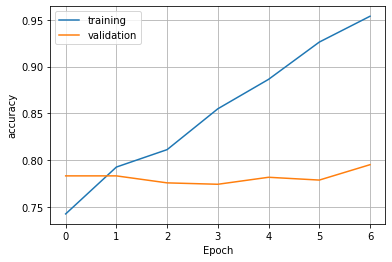

In [118]:
# Accuracy vs Epochs
plot_accuracy(history)

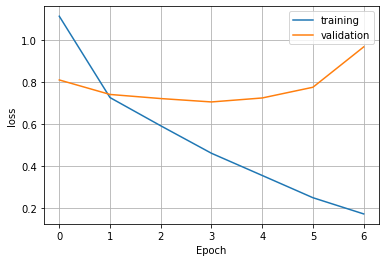

In [119]:
# Loss vs Epochs
plot_loss(history)

## 6. Conclusion and Interpretation

In [49]:
# Above 7 epochs the model is getting overfitted, which is been taken care with dropout and earlystopping callback.
# The model provides 96% accuracy and 80% validation accuracy.
# However the prediction is more accurate (high f1 score) for high rated review  and poor in low rated review data feature. 
# This is due to class imbalance in the training dataset.
# Class 1 is also having 43% f1 score which is better predicted than other low rated reviews.

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, LeakyReLU


## Embedding Layer with input_dim , embedding_size, weights , input_length 
model_1 = Sequential()
model_1.add(Embedding(num_words, embedding_size , weights = [embedding_matrix], input_length = maxlen )  )

## LSTM layer
model_1.add(LSTM(128, return_sequences =True))
## Extract Features
model_1.add(Flatten())
## Dense Layers
model_1.add(Dense(128))
# now add a ReLU layer explicitly:
model_1.add(LeakyReLU(alpha=0.05))
#model_1.add(Dropout(0.2))

model_1.add(Dense(64))
# now add a ReLU layer explicitly:
model_1.add(LeakyReLU(alpha=0.05))
#model_1.add(Dropout(0.2))
model_1.add(Dense(6, activation = 'softmax'))
model_1.summary()
model_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
history_1 = model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 100,callbacks=[es_callback])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1615, 50)          441950    
_________________________________________________________________
lstm_4 (LSTM)                (None, 1615, 128)         91648     
_________________________________________________________________
flatten_4 (Flatten)          (None, 206720)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               26460288  
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64)               

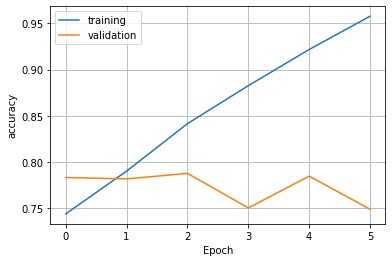

In [123]:
# Accuracy vs Epochs
plot_accuracy(history_1)

In [125]:

## Embedding Layer with input_dim , embedding_size, weights , input_length 
model_1 = Sequential()
model_1.add(Embedding(num_words, embedding_size , weights = [embedding_matrix], input_length = maxlen )  )

## LSTM layer
model_1.add(LSTM(128, return_sequences =True))
## Extract Features
model_1.add(Flatten())
## Dense Layers
model_1.add(Dense(128,activation = 'tanh'))

#model_1.add(Dropout(0.2))

model_1.add(Dense(64, activation = 'tanh'))

#model_1.add(Dropout(0.2))
model_1.add(Dense(6, activation = 'softmax'))
model_1.summary()
model_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
history_1 = model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 100,callbacks=[es_callback])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1615, 50)          441950    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1615, 128)         91648     
_________________________________________________________________
flatten_6 (Flatten)          (None, 206720)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               26460288  
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 390       
Total params: 27,002,532
Trainable params: 27,002,532
Non-trainable params: 0
__________________________________________

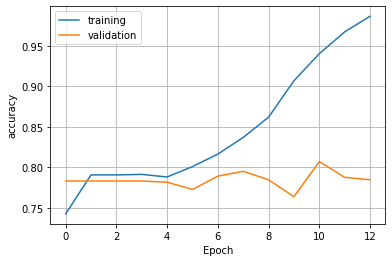

In [126]:
# Accuracy vs Epochs
plot_accuracy(history_1)

* With change in activation the test accuracy is not improving any better even with regularizing with dropout and earlystopping call back to avoid overfit